In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_train=pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv")

In [3]:
df_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [4]:
df_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [15]:
simple_imp=SimpleImputer(strategy='mean')
si=simple_imp.fit_transform(df_train[[" Excess kurtosis of the integrated profile"," Standard deviation of the DM-SNR curve"," Skewness of the DM-SNR curve"]])
si=pd.DataFrame(si,columns=[" Excess kurtosis of the integrated profile imputed"," Standard deviation of the DM-SNR curve imputed"," Skewness of the DM-SNR curve imputed"])
si

,Excess kurtosis of the integrated profile imputed,Standard deviation of the DM-SNR curve imputed,Skewness of the DM-SNR curve imputed
0,0.375485,18.399367,65.159298
1,0.712898,17.570997,102.722975
2,0.133408,22.362553,74.031324
3,-0.215989,26.351318,7.197842
4,0.825013,20.618009,76.291128
...,...,...,...
12523,-0.012418,29.308266,21.725143
12524,0.218177,26.351318,34.357283
12525,0.663456,11.628149,312.204325
12526,-0.089940,21.501505,62.334018


In [16]:
concaty=pd.concat([df_train,si],axis=1)
concaty=concaty.drop(columns=[" Excess kurtosis of the integrated profile"," Standard deviation of the DM-SNR curve"," Skewness of the DM-SNR curve"])
concaty

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class,Excess kurtosis of the integrated profile imputed,Standard deviation of the DM-SNR curve imputed,Skewness of the DM-SNR curve imputed
0,121.156250,48.372971,-0.013165,3.168896,7.449874,0.0,0.375485,18.399367,65.159298
1,76.968750,36.175557,3.388719,2.399666,9.414652,0.0,0.712898,17.570997,102.722975
2,130.585938,53.229534,-0.297242,2.743311,8.508364,0.0,0.133408,22.362553,74.031324
3,156.398438,48.865942,-0.171294,17.471572,2.958066,0.0,-0.215989,26.351318,7.197842
4,84.804688,36.117659,3.274125,2.790134,8.405008,0.0,0.825013,20.618009,76.291128
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382,0.0,-0.012418,29.308266,21.725143
12524,115.617188,46.784600,0.226757,6.140468,5.732201,0.0,0.218177,26.351318,34.357283
12525,116.031250,43.213846,0.433088,0.785117,17.055215,0.0,0.663456,11.628149,312.204325
12526,135.664062,49.933749,-0.226726,3.859532,7.398395,0.0,-0.089940,21.501505,62.334018


In [23]:
concaty["target_class"].unique()

array([0., 1.])

In [28]:
X=concaty.drop(columns=["target_class"])
Y=concaty["target_class"].astype('uint64')

In [33]:
Y.value_counts()

target_class
0    11375
1     1153
Name: count, dtype: int64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
random_classif=RandomForestClassifier(n_estimators=50)
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

0.9792498004788508

In [59]:
log_classif=LogisticRegression()
log_classif.fit(X_train,Y_train)
log_classif.score(X_test,Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9768555466879489

In [41]:
y_pred=random_classif.predict(X_test)
np.unique(y_pred)

array([0, 1], dtype=uint64)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

In [42]:
Y_test

7488     0
3776     0
6243     0
6123     0
4714     0
        ..
2664     0
6518     0
10684    0
6245     0
7381     0
Name: target_class, Length: 2506, dtype: uint64

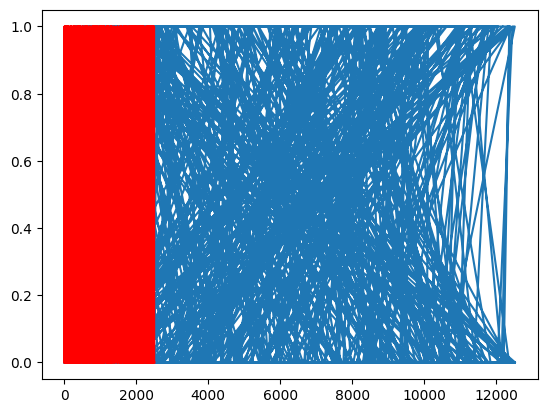

In [45]:
plt.plot(Y_test)
plt.plot(y_pred,color="red")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

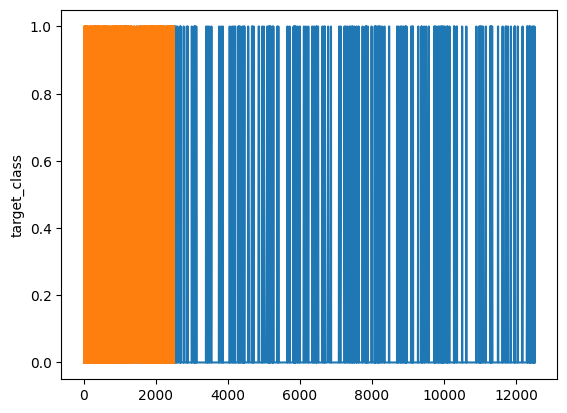

In [48]:
sns.lineplot(Y_test)
sns.lineplot(y_pred)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


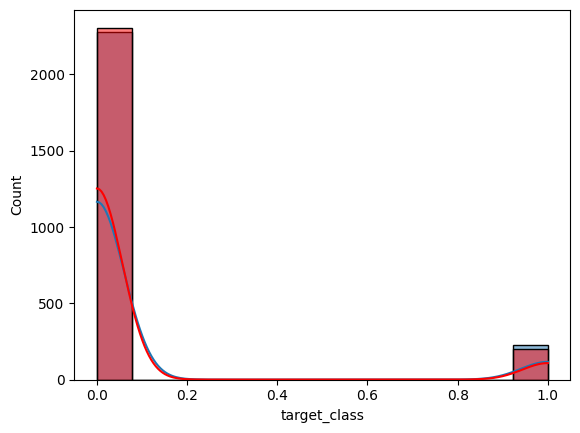

In [51]:
sns.histplot(Y_test,kde=True)
sns.histplot(y_pred,color="red",kde=True)
plt.show()

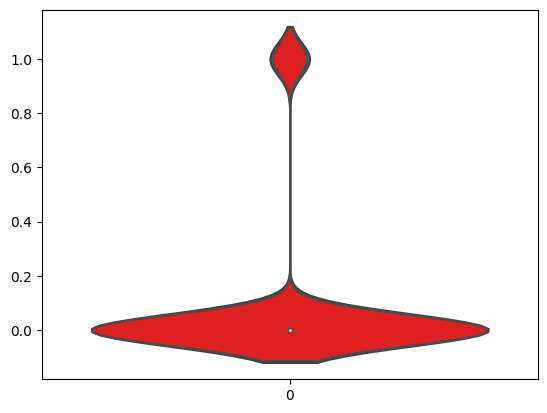

In [53]:
sns.violinplot(Y_test)
sns.violinplot(y_pred,color="red")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


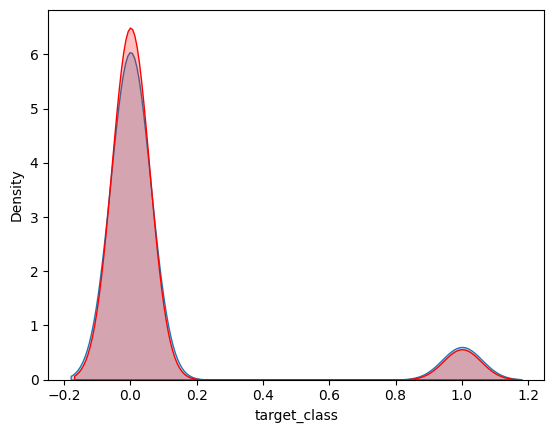

In [57]:
sns.kdeplot(Y_test,fill="shade")
sns.kdeplot(y_pred,fill="shade",color="red")
plt.show()